In [1]:
import pandas as pd
import numpy as np 
import cv2

In [2]:
from skimage import io  
from scipy import ndimage
import matplotlib.pyplot as plt 

In [3]:
i = "./data/data/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9/images/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9.png"
m = "./data/data/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9/masks/40e40018d36c8912e140d6a653456e61ab9a6fb740a83cdab356a2b253a71020.png"

In [4]:
img = io.imread( i )
mask = io.imread( m)

In [14]:
img.shape
img = 

(256, 256, 4)

In [22]:
img[: , : , 0:3].shape
img2 = img[: , : , 0:3]

In [23]:
mask.shape

(256, 256)

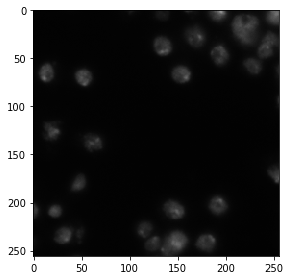

In [24]:
io.imshow( img2 )
plt.show() 

In [84]:
D = ndimage.distance_transform_edt( mask )
D[D > 0 ] = 1/D[D > 0 ]

Ls = np.where(np.logical_and(D < 0.1 , D > 0.0 ))
D[Ls] = 0.2



/home/afhuertas/data-science/scikit-image/skimage/io/_plugins/matplotlib_plugin.py:77: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


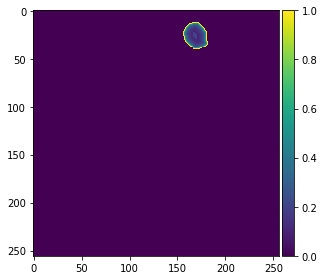

In [87]:
io.imshow( D )
plt.show() 

In [60]:
cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL,	cv2.CHAIN_APPROX_SIMPLE)
len(cnts)

M = cv2.moments( cnts[1][0] ) 
cX = int(M["m10"] / M["m00"])
cY = int(M["m01"] / M["m00"])

In [61]:
print(cX)
print(cY)

168
26


In [62]:
cv2.drawContours(mask, [  cnts[1][0]   ]  , -1, (0, 255, 0), 2)
cv2.circle(mask, (cX, cY), 1, (0, 0, 0), -1)
cv2.putText(mask, "center", (cX - 20, cY - 20),
cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [63]:
cv2.imshow("Image", mask) 
#plt.show()
#cv2.waitKey(0)

/home/afhuertas/data-science/scikit-image/skimage/io/_plugins/matplotlib_plugin.py:77: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


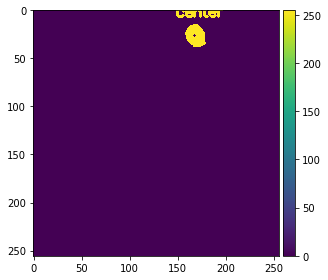

In [64]:
io.imshow(mask)
plt.show()